In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [2]:
train = pd.read_csv('projeto4_telecom_treino.csv')
train.set_index('Unnamed: 0', inplace=True)
visu = train.copy() #use in Data Visualization
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
test = pd.read_csv('projeto4_telecom_teste.csv')
test.set_index('Unnamed: 0', inplace=True)
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
2,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
4,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
5,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


# **Data Munging**

In [4]:
# see the columns
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [5]:
# checking null vallues
np.sum(train.isna())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [6]:
# Label Encoder
def encoder(df, col):
    
    from sklearn.preprocessing import LabelEncoder
    
    label = LabelEncoder()
    df.loc[:,col] = label.fit_transform(df.loc[:,col])
    
    
columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
for col in columns:
    encoder(train, col)
    encoder(test, col)

train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
# Data Balancing (churn==0 out, churn==1 in)
df_cust = pd.DataFrame(train.churn.value_counts())
df_cust['Percentage'] = 100*df_cust['churn']/train.shape[0]
df_cust

,churn,Percentage
0,2850,85.508551
1,483,14.491449


In [8]:
# doing the balancing
from imblearn.over_sampling import RandomOverSampler

# split the data
X = train.drop(['churn'], axis=1)
y = train[['churn']]

# balancing
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

# recreate the balanced data set
train = pd.concat([X_ros, y_ros], axis=1)

In [9]:
# finishing balancing (churn==0 out, churn==1 in)
df_cust = pd.DataFrame(train.churn.value_counts())
df_cust['Percentage'] = 100*df_cust['churn']/train.shape[0]
df_cust

,churn,Percentage
1,2850,50.0
0,2850,50.0


In [10]:
# Normalization
from sklearn.preprocessing import Normalizer

cols = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

train[cols] = Normalizer().fit_transform(train[cols])
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,0.273603,1,0,1,0.053438,0.566658,0.235128,0.096338,0.421948,0.211615,0.035868,0.523053,0.194515,0.023534,0.021375,0.006413,0.005771,0.002138,0
1,35,0.252976,1,0,1,0.061471,0.382065,0.290804,0.064946,0.462213,0.243519,0.039294,0.601468,0.243519,0.027071,0.032390,0.007093,0.008748,0.002364,0
2,31,0.345636,1,0,0,0.000000,0.614072,0.287610,0.104397,0.305775,0.277518,0.025986,0.410222,0.262381,0.018468,0.030779,0.012614,0.008300,0.000000,0
3,35,0.208186,0,1,0,0.000000,0.742035,0.175967,0.126151,0.153413,0.218100,0.013036,0.487998,0.220578,0.021959,0.016357,0.017349,0.004412,0.004957,0
4,36,0.205043,1,1,0,0.000000,0.455742,0.308931,0.077479,0.405438,0.333537,0.034475,0.510967,0.330803,0.022992,0.027612,0.008202,0.007464,0.008202,0


# **Data Visualization**

In [11]:
import matplotlib.pyplot as plt

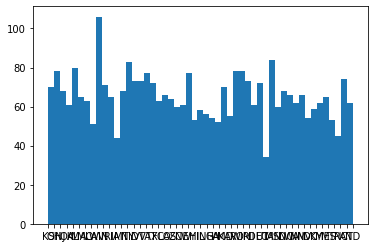

WV    106
MN     84
NY     83
AL     80
WI     78
Name: state, dtype: int64

In [12]:
# state frequency
# plot
x = visu.loc[:,'state']
plt.hist(x, bins=len(x.unique()))
plt.show()
# dataframe
df_freq_state = x.value_counts()
df_freq_state.head()

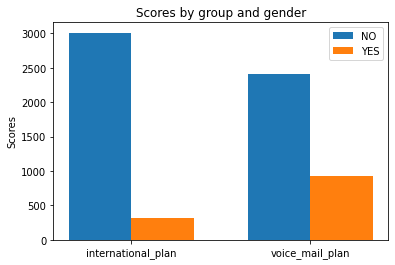

In [13]:
# plan plot
labels = ['international_plan','voice_mail_plan']
no = [visu.loc[:,'international_plan'].value_counts()[0],
      visu.loc[:,'voice_mail_plan'].value_counts()[0]]
yes = [visu.loc[:,'international_plan'].value_counts()[1],
       visu.loc[:,'voice_mail_plan'].value_counts()[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, no, width, label='NO')
ax.bar(x + width/2, yes, width, label='YES')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

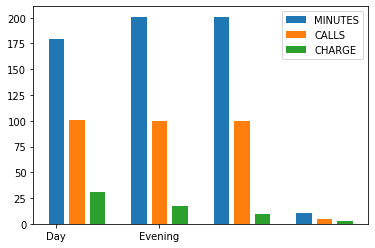

In [14]:
# plan plot
labels = ['Day','Evening','Night','Intl']
minutes = [visu.loc[:,'total_day_minutes'].mean(),
           visu.loc[:,'total_eve_minutes'].mean(),
           visu.loc[:,'total_night_minutes'].mean(),
           visu.loc[:,'total_intl_minutes'].mean()]
calls = [visu.loc[:,'total_day_calls'].mean(),
           visu.loc[:,'total_eve_calls'].mean(),
           visu.loc[:,'total_night_calls'].mean(),
           visu.loc[:,'total_intl_calls'].mean()]
charge = [visu.loc[:,'total_day_charge'].mean(),
           visu.loc[:,'total_eve_charge'].mean(),
           visu.loc[:,'total_night_charge'].mean(),
           visu.loc[:,'total_intl_charge'].mean()]
width = 0.15 # the width of the bars

fig, ax = plt.subplots()
ax.bar([0,0.8,1.6,2.4], minutes, width, label='MINUTES')
ax.bar([0.2,1,1.8,2.6], calls, width, label='CALLS')
ax.bar([0.4,1.2,2,2.8], charge, width, label='CHARGE')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **Feature Selection**

In [15]:
def metricas_fs(y_val, y_pred):
    from sklearn.metrics import confusion_matrix

    conf = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = conf.ravel()
    sens = tp / tp+fn
    acc = (tp+tn) / (tn+fp+fn+tp)
    prec = tp / (tp+fp)
    
    return {'Sensibility': sens, 'Accuracy': acc, 'Precision': prec}

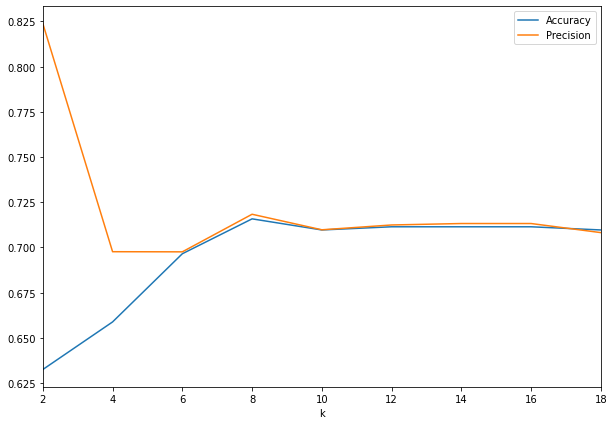

In [16]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = train.drop(['churn'], axis=1)
y = train[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

k_vs_score = []

for k in range(2,X.shape[1]+1,2):
    selector = SelectKBest(score_func=f_classif, k=k)

    Xtrain2 = selector.fit_transform(X_train, y_train)
    Xval2 = selector.transform(X_test)

    mdl = LogisticRegression()
  
    mdl.fit(Xtrain2, y_train)

    y_pred = mdl.predict(Xval2)

    errors = metricas_fs(y_test,y_pred)
    errors['k'] = k

    k_vs_score.append(errors)

k_errors = pd.DataFrame(k_vs_score)
k_errors.set_index('k', inplace = True)

# plotar Accuracy and Precision
k_errors.iloc[:,1:].plot(figsize=(10,7))

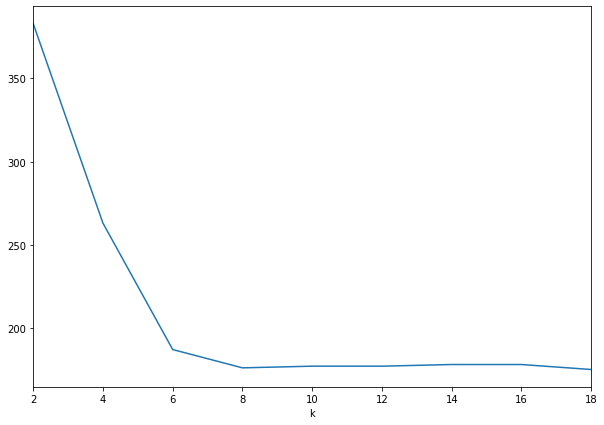

In [17]:
# plot Sensibility
k_errors.iloc[:,0].plot(figsize=(10,7))

In [18]:
# show dataframe
k_errors

,Sensibility,Accuracy,Precision
k,,,
2,383.0,0.632456,0.823810
4,263.0,0.658772,0.697619
6,187.0,0.696491,0.697543
8,176.0,0.715789,0.718336
10,177.0,0.709649,0.709738
12,177.0,0.711404,0.712406
14,178.0,0.711404,0.713208
16,178.0,0.711404,0.713208
18,175.0,0.709649,0.708178


In [19]:
# treina com o melhor k e pega o nome das colunas
selector = SelectKBest(score_func=f_classif, k=6)
selector.fit(X_train, y_train)
inpvar_selected_columns = X_train.iloc[:, selector.get_support()].columns.values
inpvar_selected_columns

array(['international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_charge',
       'number_customer_service_calls'], dtype=object)

# **Machine Learning**

## Training

In [20]:
def metricas(y_val, y_pred):
    from sklearn.metrics import confusion_matrix

    conf = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = conf.ravel()
    sens = tp / tp+fn
    acc = (tp+tn) / (tn+fp+fn+tp)
    prec = tp / (tp+fp)
    
    return {'Confusion Matrix': conf, 'Sensibility': sens, 'Accuracy': acc, 'Precision': prec}

In [21]:
# fit the model
def class_methods(method, model, params, X, y):
    from sklearn.model_selection import  GridSearchCV
    from sklearn.model_selection import train_test_split
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        
    new_model = GridSearchCV(estimator = model, param_grid = params,
                             scoring = 'neg_mean_squared_error')
    new_model.fit(X_train, y_train)
    model = new_model.best_estimator_
       
    p = model.predict(X_val)
    param = model.get_params()
    results = metricas(y_val, p)    
    
    results['Parametros'] = param
    results['Modelos'] = model
    results['Metodo'] = method
        
    return results, model

def print_results(results):
    
    print(f"Metodo: {results['Metodo']}")
    print(f"Parametros: {results['Parametros']}")
    print(f"Confusion Matrix:\n{results['Confusion Matrix']}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"Sensibility: {results['Sensibility']}")
    print(f"Precision: {results['Precision']}")

In [22]:
# start
method = 'Logistic Regression'
model = LogisticRegression()
params = {'penalty': ('l1','l2'), 'C': [1.0,10]}
X = train[inpvar_selected_columns]
y = train[['churn']]
results, model = class_methods(method, model, params, X, y)
    
print_results(results)

Metodo: Logistic Regression
Parametros: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Confusion Matrix:
[[416 147]
 [209 368]]
Accuracy: 0.6877192982456141
Sensibility: 210.0
Precision: 0.7145631067961165


## Testing

We're using the following set of features, just run the cell below to check. To create you own examples, in the next cell there will be the creation of X_examples, which can be used for testing. Remember, the data must be normalized.

In [23]:
inpvar_selected_columns

array(['international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_charge',
       'number_customer_service_calls'], dtype=object)

In [24]:
X_example = pd.DataFrame({'international_plan': 0, 'voice_mail_plan': 1,
                          'total_day_minutes': 0.566658, 'total_day_charge': 0.096338,
                          'total_intl_calls': 0.006413, 'number_customer_service_calls': 0.002138},
                         index=[0])

In [25]:
# calculates the prediction
model.predict(X_example)

array([1])

In [26]:
# calculates the probability for each group
model.predict_proba(X_example)

array([[0.19329064, 0.80670936]])